In [ ]:
# https://www.youtube.com/watch?v=C64BIMx7Slw
# this program predicts the price of FB stock for a specific day

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
from sklearn.svm import SVR
plt.style.use('fivethirtyeight')

In [52]:
df = web.DataReader('FB', data_source='yahoo', start='2019-05-01', end='2019-05-31')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-05-01,196.179993,193.009995,194.779999,193.029999,15996600,193.029999
2019-05-02,194.000000,189.750000,193.000000,192.529999,13209500,192.529999
2019-05-03,196.160004,193.710007,194.380005,195.470001,14575400,195.470001
2019-05-06,194.279999,190.550003,191.240005,193.880005,13994900,193.880005
2019-05-07,192.899994,187.850006,192.539993,189.770004,16253000,189.770004
2019-05-08,190.720001,188.550003,189.389999,189.539993,12505700,189.539993
2019-05-09,189.770004,186.259995,187.199997,188.649994,12967000,188.649994
2019-05-10,190.000000,184.589996,188.250000,188.339996,12578500,188.339996
2019-05-13,185.429993,180.839996,183.500000,181.539993,16833300,181.539993


In [53]:
df.reset_index(level=0, inplace=True)
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-05-01,196.179993,193.009995,194.779999,193.029999,15996600,193.029999
1,2019-05-02,194.000000,189.750000,193.000000,192.529999,13209500,192.529999
2,2019-05-03,196.160004,193.710007,194.380005,195.470001,14575400,195.470001
3,2019-05-06,194.279999,190.550003,191.240005,193.880005,13994900,193.880005
4,2019-05-07,192.899994,187.850006,192.539993,189.770004,16253000,189.770004
5,2019-05-08,190.720001,188.550003,189.389999,189.539993,12505700,189.539993
6,2019-05-09,189.770004,186.259995,187.199997,188.649994,12967000,188.649994
7,2019-05-10,190.000000,184.589996,188.250000,188.339996,12578500,188.339996
8,2019-05-13,185.429993,180.839996,183.500000,181.539993,16833300,181.539993
9,2019-05-14,183.490005,178.100006,182.520004,180.729996,17628100,180.729996


In [54]:
# save the last row
last_row = df.tail(1)

In [55]:
## prepare the date for training the SVR model
# remove the last row
# df = df.head(len(df) - 1)
df = df[:-1]

In [56]:
# the features/independent dataset
days = []
for date in df.Date:
    str = date.strftime('%Y-%m-%d')
    day = int(str.split('-')[2])
    days.append([day])
print(days)

[[1], [2], [3], [6], [7], [8], [9], [10], [13], [14], [15], [16], [17], [20], [21], [22], [23], [24], [28], [29], [30]]


In [57]:
# the dependent dataset
adj_closes = []
for adj_close in df['Adj Close']:
    adj_closes.append(float(adj_close))
print(adj_closes)

[193.02999877929688, 192.52999877929688, 195.47000122070312, 193.8800048828125, 189.77000427246094, 189.5399932861328, 188.64999389648438, 188.33999633789062, 181.5399932861328, 180.72999572753906, 186.27000427246094, 186.99000549316406, 185.3000030517578, 182.72000122070312, 184.82000732421875, 185.32000732421875, 180.8699951171875, 181.05999755859375, 184.30999755859375, 182.19000244140625, 183.00999450683594]


In [58]:
# create 3 Support Vector Regression models
svr_linear = SVR(kernel='linear', C=1000.0)
svr_linear.fit(days, adj_closes)

svr_poly = SVR(kernel='poly', C=1000.0, degree=2)
svr_poly.fit(days, adj_closes)

svr_rbf = SVR(kernel='rbf', C=1000.0, gamma=0.15)
svr_rbf.fit(days, adj_closes)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.15,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

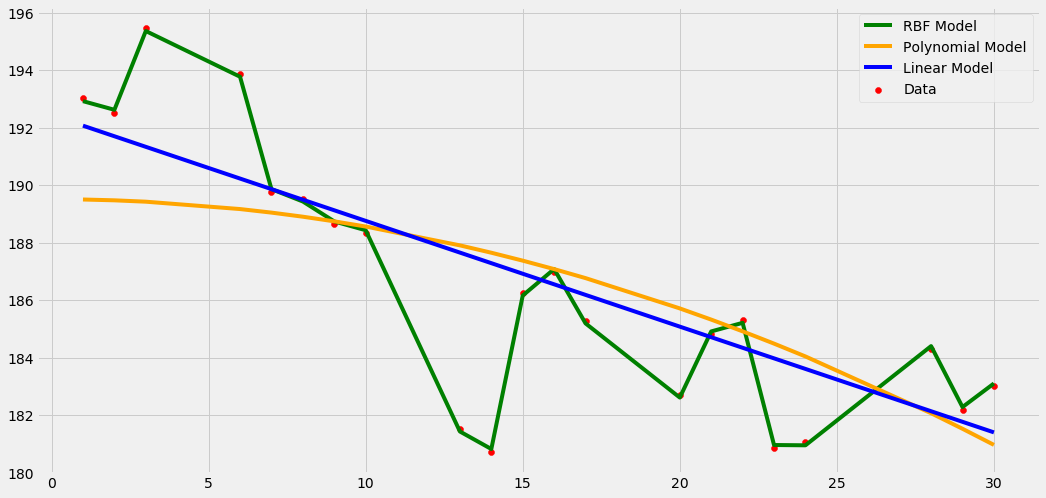

In [59]:
# plot the models to see which has the best fit
plt.figure(figsize=(16, 8))
plt.scatter(days, adj_closes, color='red', label='Data')
plt.plot(days, svr_rbf.predict(days), color='green', label='RBF Model')
plt.plot(days, svr_poly.predict(days), color='orange', label='Polynomial Model')
plt.plot(days, svr_linear.predict(days), color='blue', label='Linear Model')
plt.legend()
plt.show()

In [60]:
# show the predicted price for a given day
day = [[31]]
print('The RBF SVR predicted:', svr_rbf.predict(day))
print('The Linear SVR predicted:', svr_linear.predict(day))
print('The Polynomial SVR predicted:', svr_poly.predict(day))

The RBF SVR predicted: [185.04609328]
The Linear SVR predicted: [181.04143808]
The Polynomial SVR predicted: [180.39533557]


In [61]:
# print the actual stock price on day 31
print('The actual price:', last_row['Adj Close'][21])

The actual price: 177.47000122070312


In [ ]:
# The actual price: 177.47000122070312
# so the closest is The Polynomial SVR at [180.39533557]